In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import calendar
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("Global YouTube Statistics.csv")

In [3]:
# Display the first few rows of the dataframe to understand its structure
df.head(1)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,Country,Abbreviation,...,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Population,Unemployment rate (%),Urban_population,Latitude,Longitude,created_date,Gross tertiary education enrollment (%)
0,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,United States,US,...,4000000,64700000,8000000,328239523,14.7,270663028,37.09024,-95.712891,20-02-2012,88.2


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Duplicates found in the 'Youtuber' column:


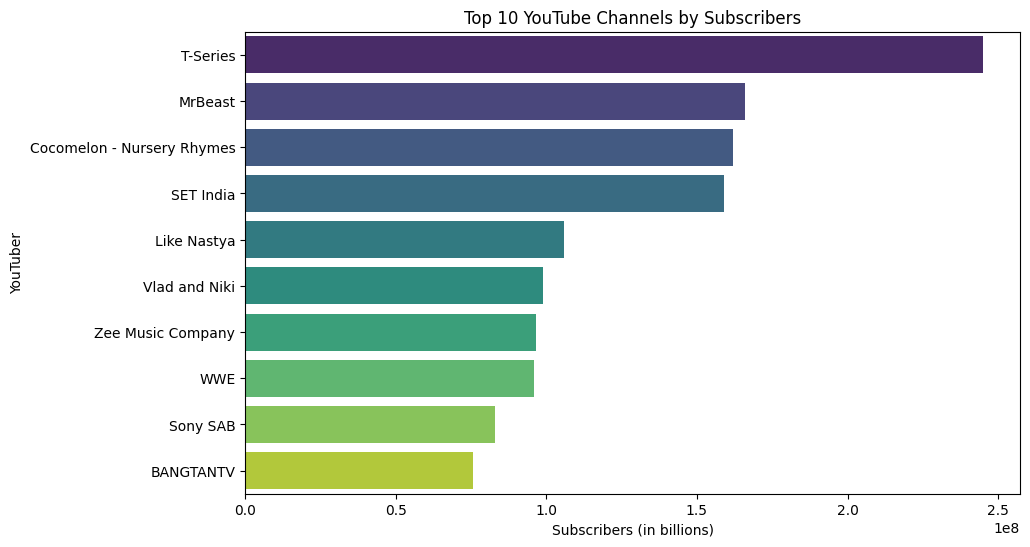

In [5]:
# 1. What are the top 10 YouTube channels based on the number of subscribers?

# Check for duplicates in the 'Youtuber' column

duplicate_channels = df[df.duplicated(subset='Youtuber', keep=False)]

if not duplicate_channels.empty:

    print("Duplicates found in the 'Youtuber' column:")
    # print(duplicate_channels)


# Drop duplicates to ensure unique YouTube channels

df_unique = df.drop_duplicates(subset='Youtuber')


# Get the top 10 unique YouTube channels based on the number of subscribers

top_10_subscribers = df_unique.nlargest(10, 'subscribers')[

    ['Youtuber', 'subscribers']]


# Plot the top 10 YouTube channels by subscribers

plt.figure(figsize=(10, 6))

sns.barplot(x='subscribers', y='Youtuber',

            data=top_10_subscribers, palette='viridis')

plt.title('Top 10 YouTube Channels by Subscribers')

plt.xlabel('Subscribers (in billions)')

plt.ylabel('YouTuber')

plt.show()

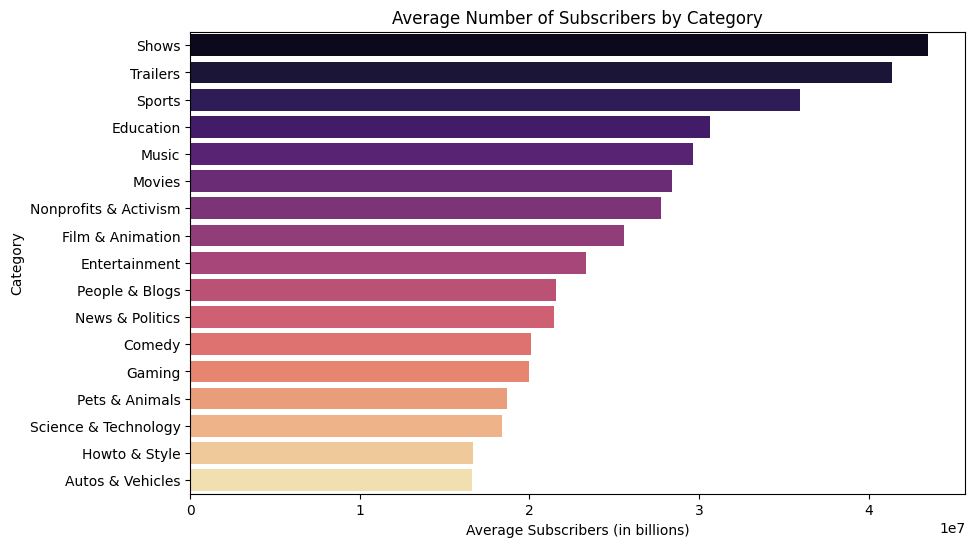

In [6]:
# 2. Which category has the highest average number of subscribers?
category_avg_subs = df.groupby(
    'category')['subscribers'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_avg_subs.values,
            y=category_avg_subs.index, palette='magma')
plt.title('Average Number of Subscribers by Category')
plt.xlabel('Average Subscribers (in billions)')
plt.ylabel('Category')
plt.show()

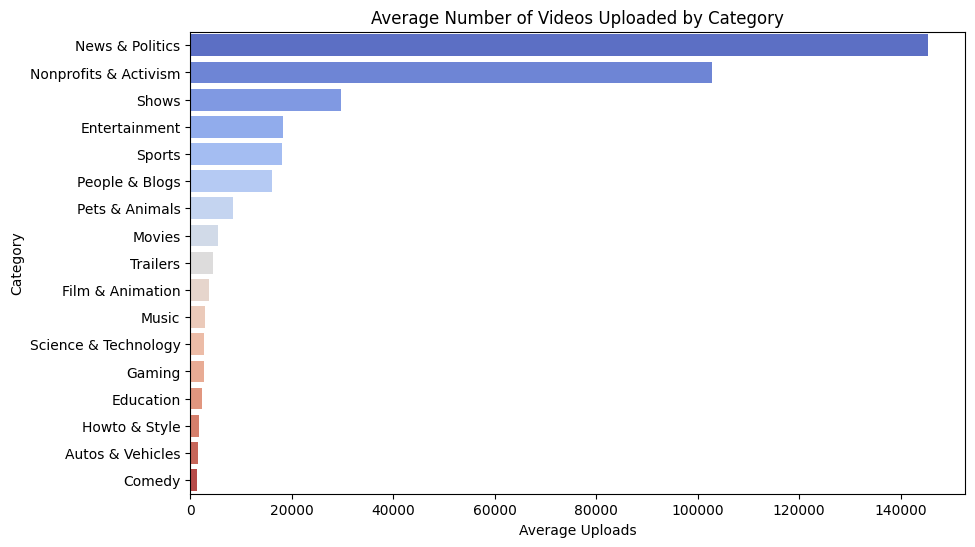

In [7]:
# 3. How many videos, on average, are uploaded by YouTube channels in each category?
category_avg_uploads = df.groupby(
    'category')['uploads'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_avg_uploads.values,
            y=category_avg_uploads.index, palette='coolwarm')
plt.title('Average Number of Videos Uploaded by Category')
plt.xlabel('Average Uploads')
plt.ylabel('Category')
plt.show()

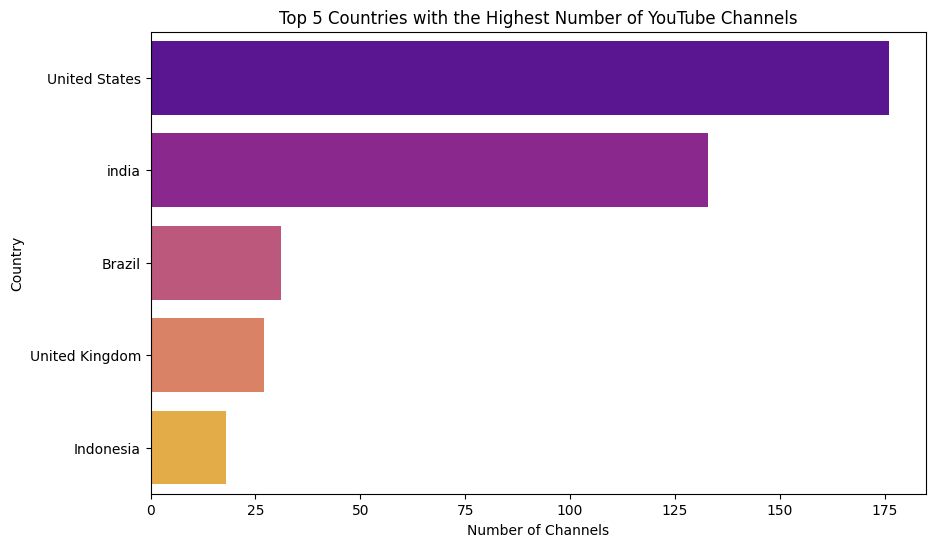

In [8]:
# 4. What are the top 5 countries with the highest number of YouTube channels?
top_5_countries = df['Country'].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_countries.values,
            y=top_5_countries.index, palette='plasma')
plt.title('Top 5 Countries with the Highest Number of YouTube Channels')
plt.xlabel('Number of Channels')
plt.ylabel('Country')
plt.show()

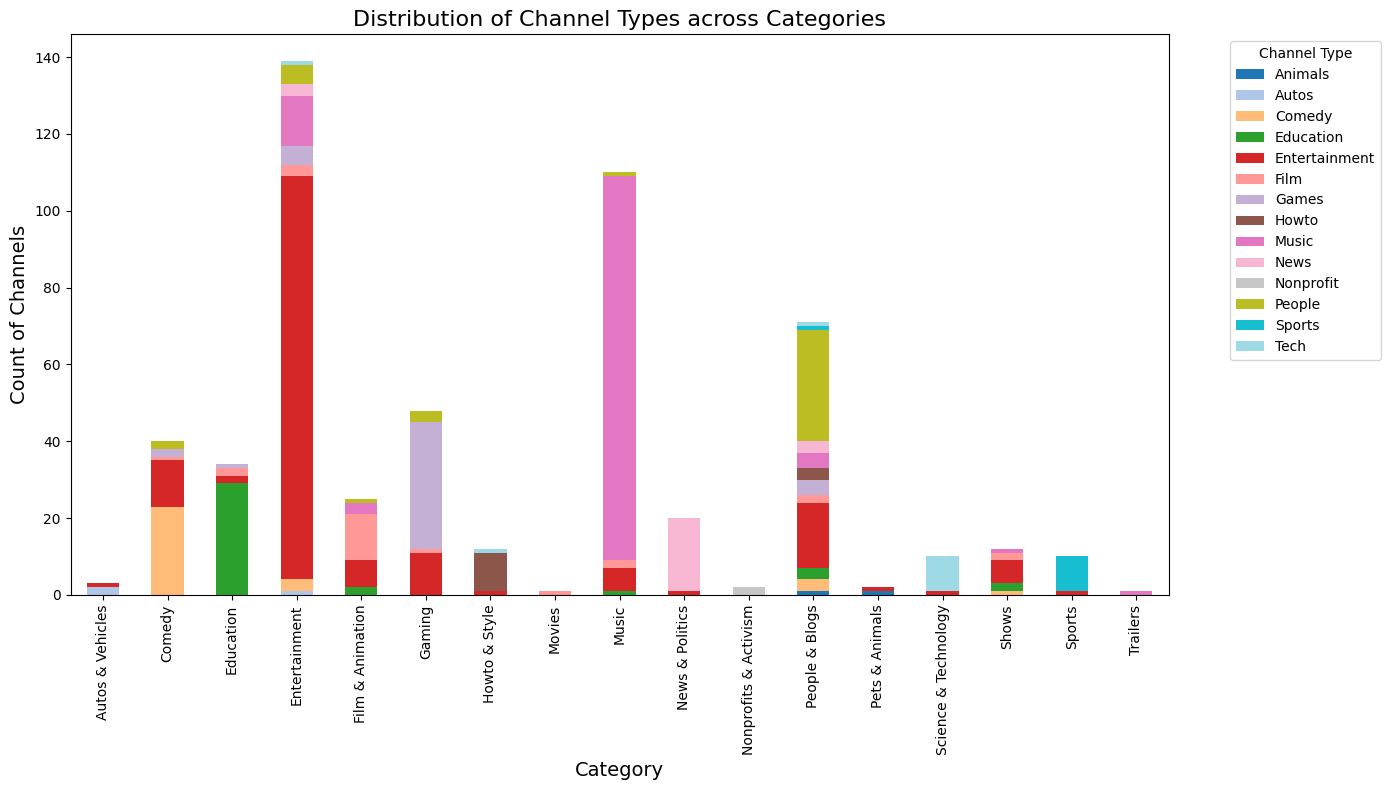

In [9]:
# 5. What is the distribution of channel types across different categories?

# Create a pivot table to get the count of channel types within each category
category_channel_type_counts = df.pivot_table(
    index='category', columns='channel_type', aggfunc='size', fill_value=0)

# Plot a stacked bar plot
category_channel_type_counts.plot(
    kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Improve the title and labels
plt.title('Distribution of Channel Types across Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count of Channels', fontsize=14)

# Show the legend outside the plot
plt.legend(title='Channel Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

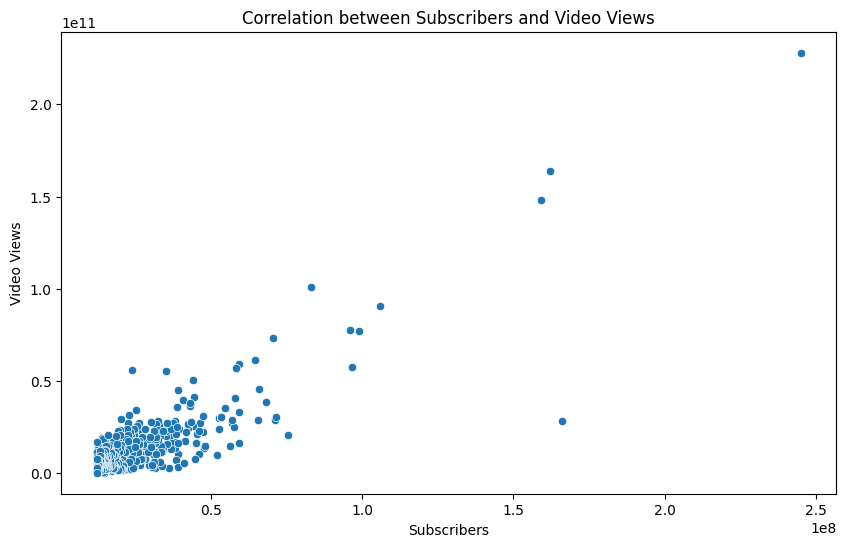

Interpretation:- There is a positive correlation between the number of subscribers and total video views for YouTube channels.
 Channels with more subscribers generally tend to have higher total video views.
 However, there are outliers that have significantly higher subscribers and video views, which could skew the overall correlation.
Pearson correlation coefficient: 0.8582454817358005
Conclusion:- There is a strong positive correlation between the number of subscribers and total video views for YouTube channels.
 This implies that channels with a larger subscriber base tend to accumulate more video views, which is expected as more subscribers likely contribute to higher view counts.


In [10]:
# 6. Is there a correlation between the number of subscribers and total video views for YouTube channels?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='subscribers', y='video views', data=df)
plt.title('Correlation between Subscribers and Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.show()

print("Interpretation:- There is a positive correlation between the number of subscribers and total video views for YouTube channels.\n Channels with more subscribers generally tend to have higher total video views.\n However, there are outliers that have significantly higher subscribers and video views, which could skew the overall correlation.")
# Calculate the Pearson correlation coefficient
correlation = df['subscribers'].corr(df['video views'])
print(f'Pearson correlation coefficient: {correlation}')

print("Conclusion:- There is a strong positive correlation between the number of subscribers and total video views for YouTube channels.\n This implies that channels with a larger subscriber base tend to accumulate more video views, which is expected as more subscribers likely contribute to higher view counts.")

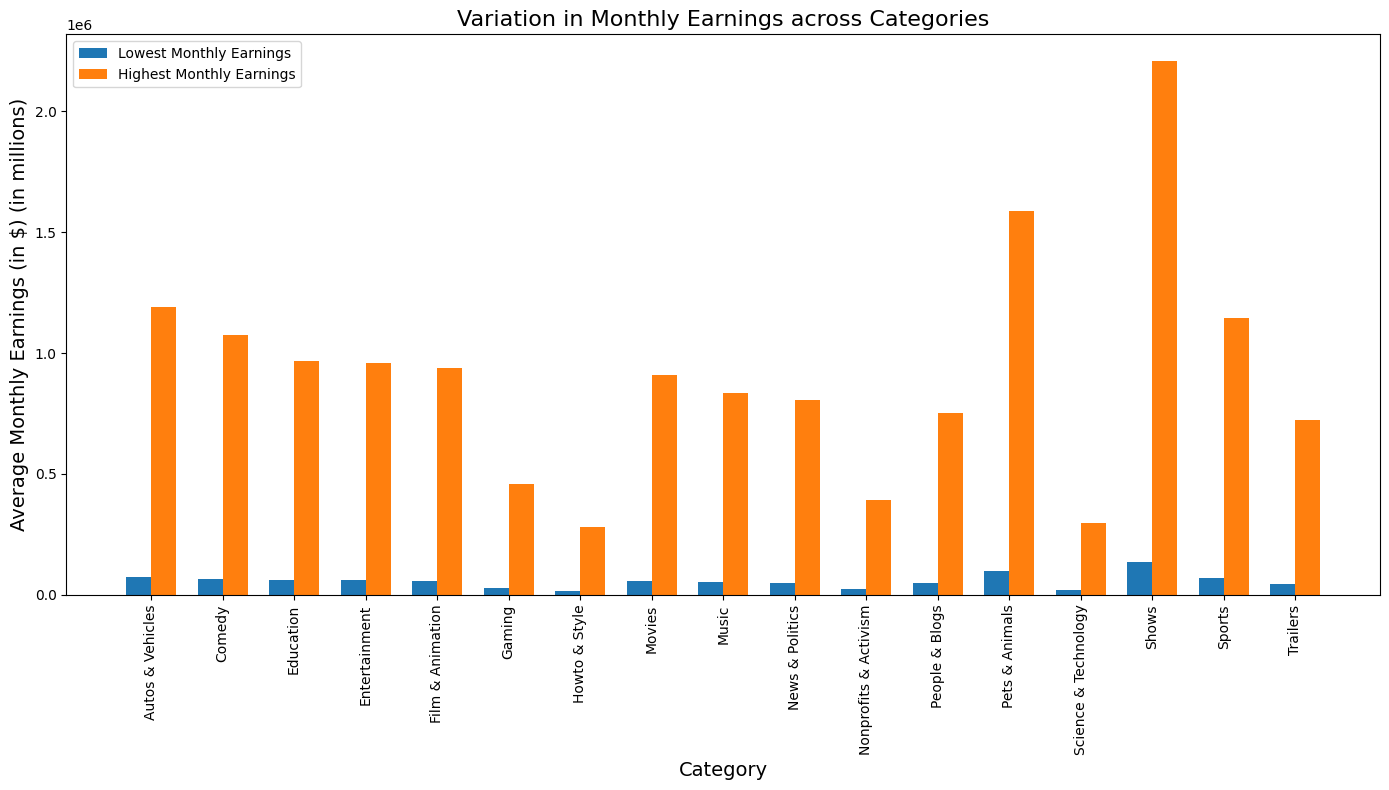

In [11]:
# 7. How do the monthly earnings vary throughout different categories?

# Calculate the average lowest and highest monthly earnings for each category
category_earnings = df.groupby('category')[
    ['lowest_monthly_earnings', 'highest_monthly_earnings']].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(14, 8))
bar_width = 0.35
index = range(len(category_earnings))

# Plot lowest monthly earnings
plt.bar(index, category_earnings['lowest_monthly_earnings'],
        bar_width, label='Lowest Monthly Earnings')

# Plot highest monthly earnings
plt.bar([i + bar_width for i in index], category_earnings['highest_monthly_earnings'],
        bar_width, label='Highest Monthly Earnings')

# Improve the title and labels
plt.title('Variation in Monthly Earnings across Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Monthly Earnings (in $) (in millions)', fontsize=14)
plt.xticks([i + bar_width / 2 for i in index],
            category_earnings['category'], rotation=90)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

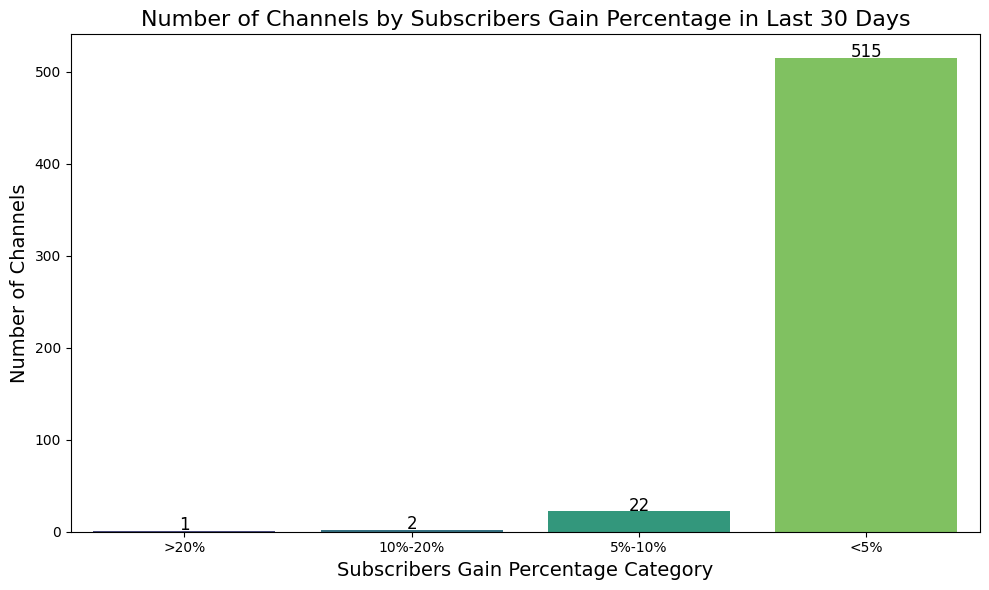


Channels with >20% gain:
['DaFuq!?Boom!']

Channels with 10%-20% gain:
['Jess No Limit', 'Go Ami Go!']

Channels with 5%-10% gain:
['LeoNata Family', 'Topper Guild', 'Prime Video India', 'ViralHog', '_vector_', 'Heroindori', 'Ishaan Ali 11', 'Priyal Kukreja', 'jaanvi patel', 'Pokï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½', 'Ricis Official', 'TheDonato', 'PANDA BOI', 'tuzelity SHUFFLE', 'Ami Rodriguez', 'dednahype', 'Willie Salim', 'Younes Zarou', 'ILYA BORZOV', 'ISSEI / ï¿½ï¿½ï¿½ï¿½', "GH'S", 'Natan por Aï¿']

Maximum percentage gain achieved: 34.183673469387756% by DaFuq!?Boom!


In [12]:
# 8. What is the overall trend in subscribers gained in the last 30 days across all channels?

# Calculate the percentage of subscribers gained in the last 30 days
df['subscribers_gain_percentage'] = (
    df['subscribers_for_last_30_days'] / df['subscribers']) * 100

# Categorize the channels based on the given thresholds
conditions = [
    (df['subscribers_gain_percentage'] > 20),
    (df['subscribers_gain_percentage'] <= 20) & (
        df['subscribers_gain_percentage'] > 10),
    (df['subscribers_gain_percentage'] <= 10) & (
        df['subscribers_gain_percentage'] > 5),
    (df['subscribers_gain_percentage'] <= 5)
]
choices = ['>20%', '10%-20%', '5%-10%', '<5%']
df['gain_category'] = np.select(conditions, choices, default='Other')

# Count the number of channels in each category
category_counts = df['gain_category'].value_counts().reindex(choices)

# Plot the results in a bar graph
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=category_counts.index,
                        y=category_counts.values, palette='viridis')

# Set the title and labels
plt.title(
    'Number of Channels by Subscribers Gain Percentage in Last 30 Days', fontsize=16)
plt.xlabel('Subscribers Gain Percentage Category', fontsize=14)
plt.ylabel('Number of Channels', fontsize=14)

# Add counts on top of each bar
for i, count in enumerate(category_counts.values):
    bar_plot.text(i, count + 1, str(count), ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Print the channel names for each category
for category in choices:
    if category != '<5%':
        print(f"\nChannels with {category} gain:")
        channels = df[df['gain_category'] == category]['Youtuber']
        print(channels.to_list())

# Calculate the maximum percentage gain achieved
max_gain = df['subscribers_gain_percentage'].max()
max_gain_channel = df.loc[df['subscribers_gain_percentage'].idxmax()
                          ]['Youtuber']
print(f"\nMaximum percentage gain achieved: {max_gain}% by {max_gain_channel}")

Channels with outliers only in lowest yearly earnings:
['Taylor Swift']

Channels with outliers only in highest yearly earnings:
[]


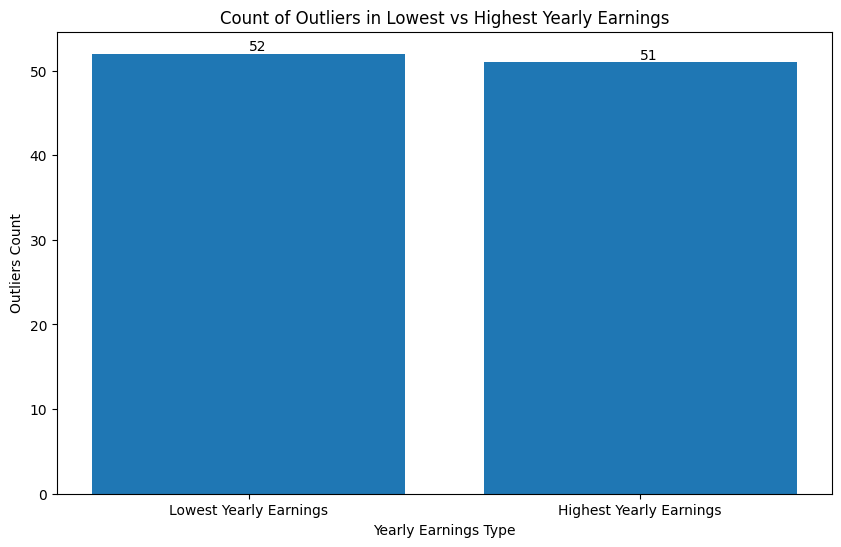

Yes, there are outliers in terms of yearly earnings from YouTube channels. 
 After analyzing the dataset, we found that there are channels with yearly earnings that are significantly higher or lower than the majority of channels, indicating outliers in both the lowest and highest yearly earnings categories. 
These outliers can have a notable impact on the overall distribution and statistical analysis of yearly earnings among YouTube channels.


In [13]:
# 9. Are there any outliers in terms of yearly earnings from YouTube channels?

Q1_lowest = df['lowest_yearly_earnings'].quantile(0.25)
Q3_lowest = df['lowest_yearly_earnings'].quantile(0.75)
IQR_lowest = Q3_lowest - Q1_lowest

Q1_highest = df['highest_yearly_earnings'].quantile(0.25)
Q3_highest = df['highest_yearly_earnings'].quantile(0.75)
IQR_highest = Q3_highest - Q1_highest

# Define the outlier thresholds
lower_bound_lowest = Q1_lowest - 1.5 * IQR_lowest
upper_bound_lowest = Q3_lowest + 1.5 * IQR_lowest

lower_bound_highest = Q1_highest - 1.5 * IQR_highest
upper_bound_highest = Q3_highest + 1.5 * IQR_highest

# Identify outliers for lowest and highest yearly earnings
outliers_lowest = df[(df['lowest_yearly_earnings'] < lower_bound_lowest) | (
    df['lowest_yearly_earnings'] > upper_bound_lowest)]
outliers_highest = df[(df['highest_yearly_earnings'] < lower_bound_highest) | (
    df['highest_yearly_earnings'] > upper_bound_highest)]

# Find channels unique to each category
unique_outliers_lowest = outliers_lowest[~outliers_lowest['Youtuber'].isin(
    outliers_highest['Youtuber'])]
unique_outliers_highest = outliers_highest[~outliers_highest['Youtuber'].isin(
    outliers_lowest['Youtuber'])]

# Print channels unique to each category
print("Channels with outliers only in lowest yearly earnings:")
print(unique_outliers_lowest['Youtuber'].values)

print("\nChannels with outliers only in highest yearly earnings:")
print(unique_outliers_highest['Youtuber'].values)

# Plot outliers count in a bar graph with count annotations
plt.figure(figsize=(10, 6))
outliers_count = [len(outliers_lowest), len(outliers_highest)]
labels = ['Lowest Yearly Earnings', 'Highest Yearly Earnings']
bars = plt.bar(labels, outliers_count)
plt.xlabel('Yearly Earnings Type')
plt.ylabel('Outliers Count')
plt.title('Count of Outliers in Lowest vs Highest Yearly Earnings')

# Add count annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval, round(yval, 2), va='bottom')

plt.show()

print("Yes, there are outliers in terms of yearly earnings from YouTube channels. \n After analyzing the dataset, we found that there are channels with yearly earnings that are significantly higher or lower than the majority of channels, indicating outliers in both the lowest and highest yearly earnings categories. \nThese outliers can have a notable impact on the overall distribution and statistical analysis of yearly earnings among YouTube channels.")

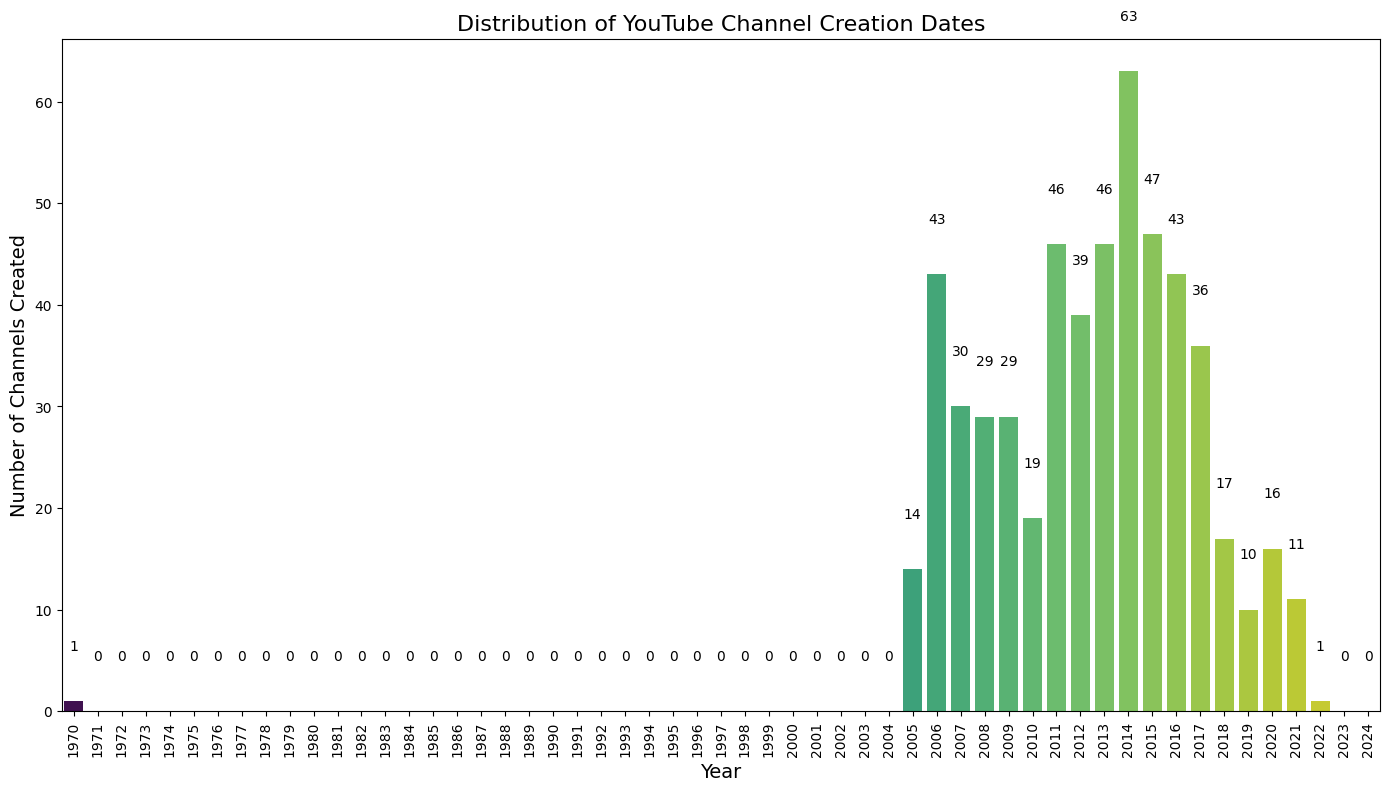

The month with the highest number of channel creations is January with 59 channels created.


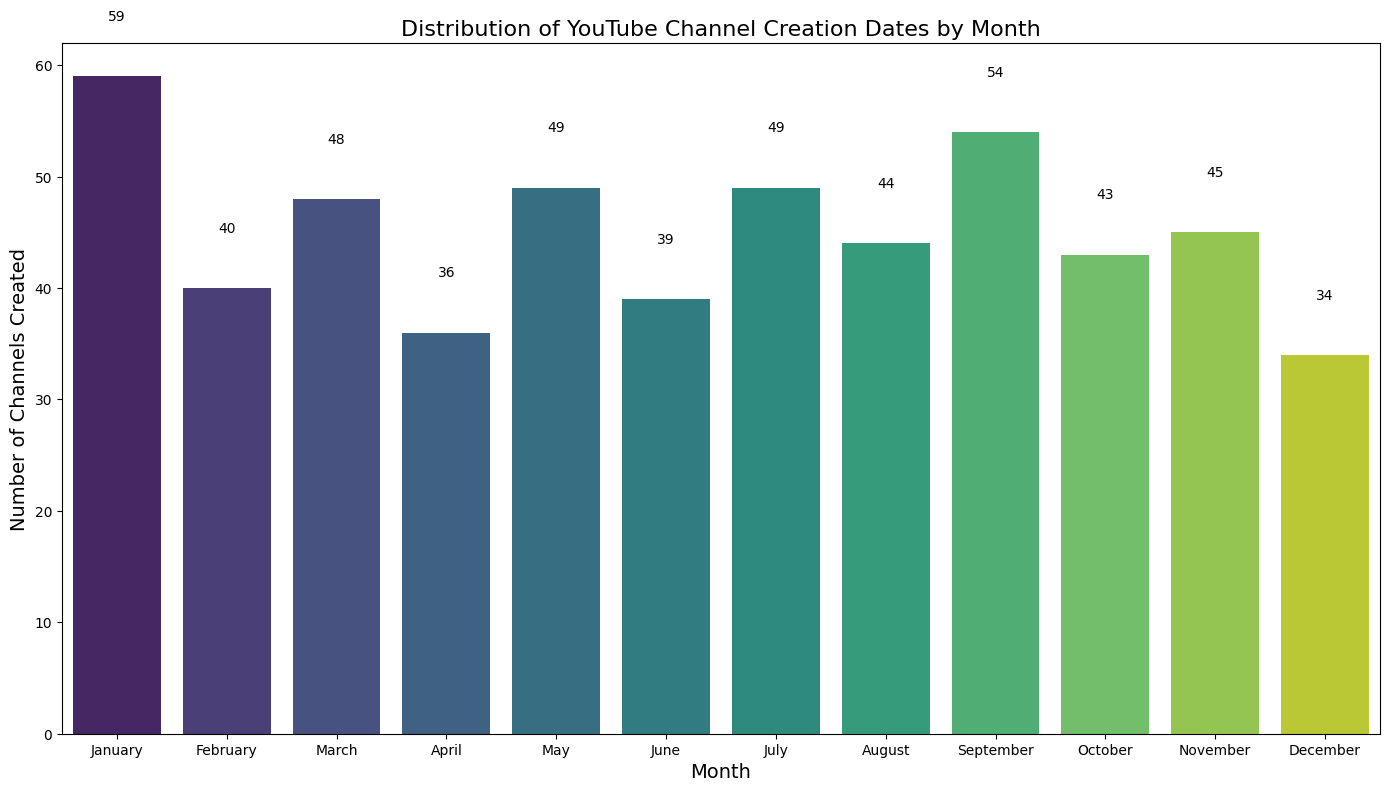

In [14]:
# 10. What is the distribution of channel creation dates? Is there any trend over time?

# Convert 'created_date' to datetime
df['created_date'] = pd.to_datetime(df['created_date'], format='%d-%m-%Y')

# Extract the year and month from 'created_date'
df['created_year'] = df['created_date'].dt.year
df['created_month'] = df['created_date'].dt.month

# Create a range of years from the earliest year to 2024
year_range = list(range(df['created_year'].min(), 2025))

# Count the number of channels created each year
channel_counts_by_year = df['created_year'].value_counts().reindex(
    year_range, fill_value=0)

# Plot the distribution of channel creation dates
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x=channel_counts_by_year.index,
                        y=channel_counts_by_year.values, palette='viridis')

# Set the title and labels
plt.title('Distribution of YouTube Channel Creation Dates', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Channels Created', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add counts on top of each bar
for i, count in enumerate(channel_counts_by_year.values):
    bar_plot.text(i, count + 5, str(count), ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# Group by month and count the number of channels created each month
channel_counts_by_month = df['created_month'].value_counts().sort_index()

# Identify the month with the highest number of channel creations
max_month = channel_counts_by_month.idxmax()
max_month_count = channel_counts_by_month.max()

# Convert month number to month name
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
max_month_name = month_names[max_month - 1]

print(
    f"The month with the highest number of channel creations is {max_month_name} with {max_month_count} channels created.")

# Plot the distribution of channel creation dates by month
plt.figure(figsize=(14, 8))
sns.barplot(x=month_names, y=channel_counts_by_month.values, palette='viridis')

# Set the title and labels
plt.title('Distribution of YouTube Channel Creation Dates by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Channels Created', fontsize=14)

# Add counts on top of each bar
for i, count in enumerate(channel_counts_by_month.values):
    plt.text(i, count + 5, str(count), ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

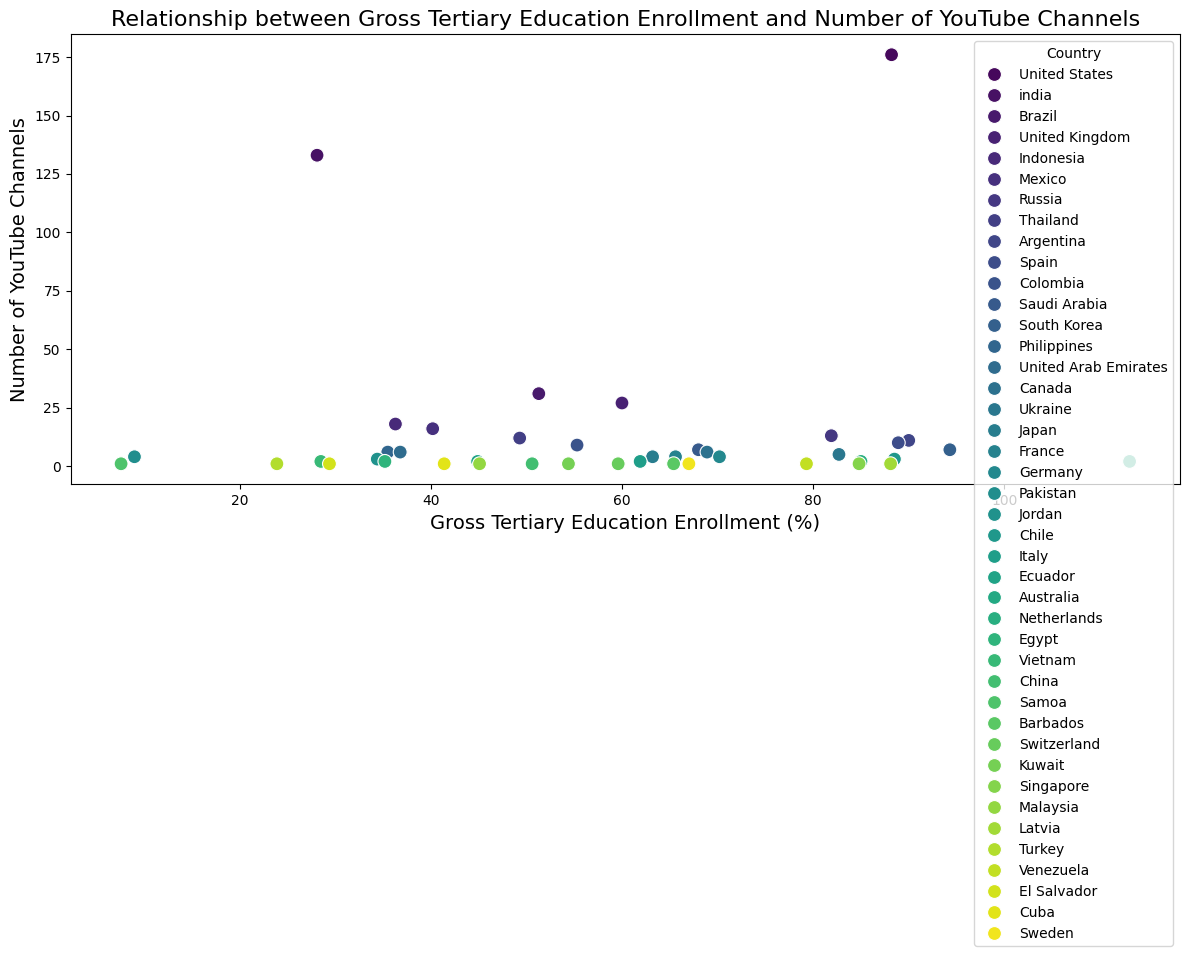

Pearson correlation coefficient: 0.0389678619785874
P-value: 0.8064469295630986
Conclusion:
 Based on the Pearson correlation coefficient of 0.039 and the high p-value of 0.806,
 we conclude that there is no significant relationship between gross tertiary education enrollment and the number of YouTube channels in a country. 
This implies that variations in tertiary education enrollment rates do not appear to be associated with the number of YouTube channels across different countries.


In [15]:
# 11. Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?

# Calculate the number of YouTube channels for each country
channels_per_country = df['Country'].value_counts().reset_index()
channels_per_country.columns = ['Country', 'num_channels']

# Aggregate the gross tertiary education enrollment for each country
education_enrollment_per_country = df.groupby(
    'Country')['Gross tertiary education enrollment (%)'].mean().reset_index()

# Merge the two dataframes on 'Country'
merged_df = pd.merge(channels_per_country,
                     education_enrollment_per_country, on='Country')

# Plot a scatter plot to visualize the relationship
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df, x='Gross tertiary education enrollment (%)',
                y='num_channels', hue='Country', palette='viridis', s=100)

# Set the title and labels
plt.title('Relationship between Gross Tertiary Education Enrollment and Number of YouTube Channels', fontsize=16)
plt.xlabel('Gross Tertiary Education Enrollment (%)', fontsize=14)
plt.ylabel('Number of YouTube Channels', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(
    merged_df['Gross tertiary education enrollment (%)'], merged_df['num_channels'])
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

print("Conclusion:\n Based on the Pearson correlation coefficient of 0.039 and the high p-value of 0.806,\n we conclude that there is no significant relationship between gross tertiary education enrollment and the number of YouTube channels in a country. \nThis implies that variations in tertiary education enrollment rates do not appear to be associated with the number of YouTube channels across different countries.")

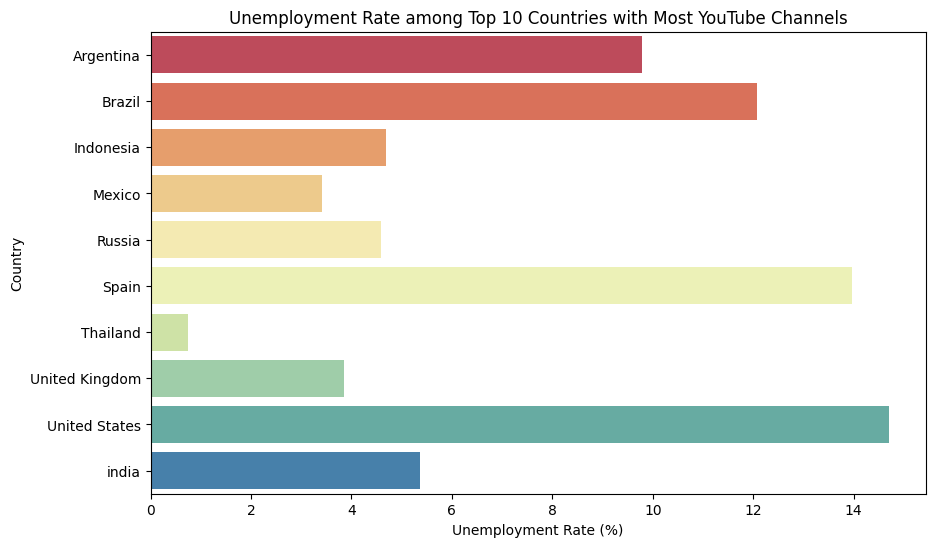

In [16]:
# 12. How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?
top_10_countries = df['Country'].value_counts().nlargest(10).index
unemployment_top_10 = df[df['Country'].isin(top_10_countries)].groupby('Country')[
    'Unemployment rate (%)'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=unemployment_top_10.values,
            y=unemployment_top_10.index, palette='Spectral')
plt.title('Unemployment Rate among Top 10 Countries with Most YouTube Channels')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Country')
plt.show()

The overall average urban population percentage in countries with YouTube channels is 72.36%


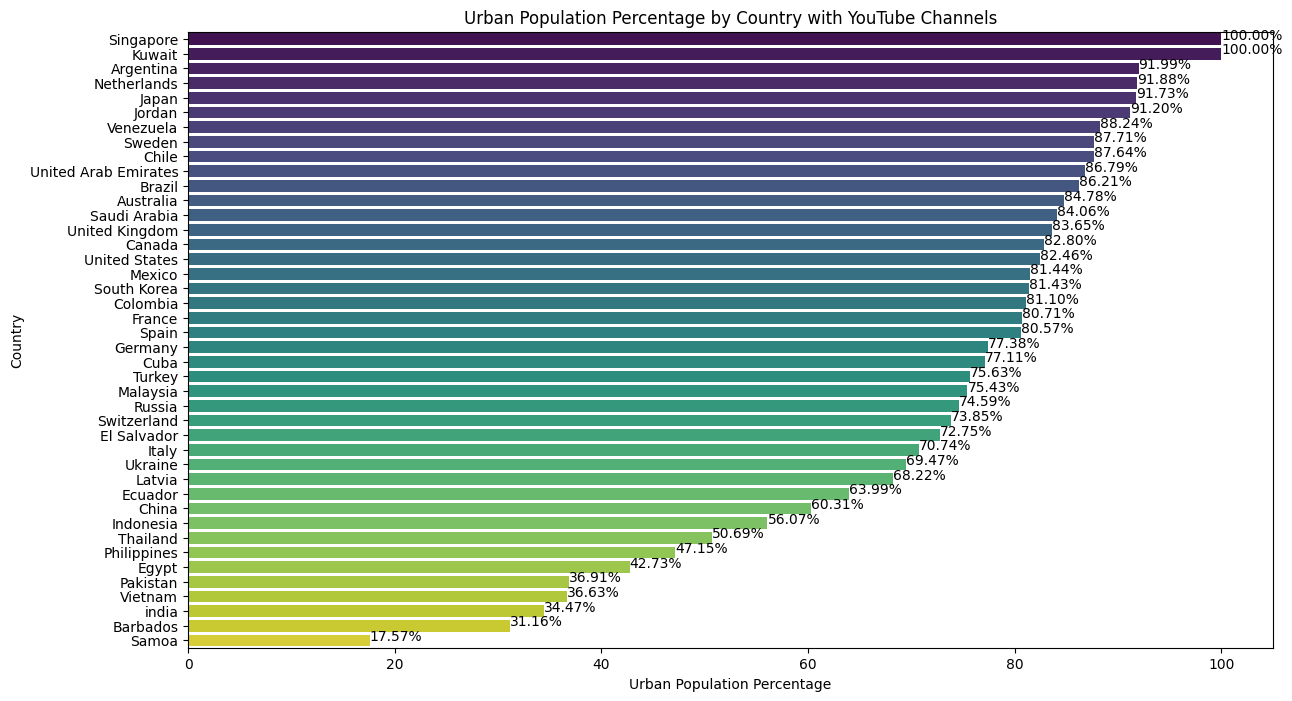

In [17]:
# 13. What is the average urban population percentage in countries with YouTube channels?

# Filter out rows where population data is not available
df_filtered = df.dropna(subset=['Urban_population', 'Population'])

# Calculate the urban population percentage
df_filtered['Urban_population_percentage'] = (df_filtered['Urban_population'] / df_filtered['Population']) * 100

# Group by 'Country' and calculate the mean urban population percentage
average_urban_population = df_filtered.groupby('Country')['Urban_population_percentage'].mean().reset_index()

# Calculate the overall average urban population percentage across all countries
overall_average_urban_population = average_urban_population['Urban_population_percentage'].mean()

print(f"The overall average urban population percentage in countries with YouTube channels is {overall_average_urban_population:.2f}%")

# print(average_urban_population)

# Sort by urban population percentage for better visualization
average_urban_population = average_urban_population.sort_values(
    by='Urban_population_percentage', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(14, 8))
sns.barplot(x='Urban_population_percentage', y='Country',
            data=average_urban_population, palette='viridis')
plt.title('Urban Population Percentage by Country with YouTube Channels')
plt.xlabel('Urban Population Percentage')
plt.ylabel('Country')

# Display the values on top of the bars
for index, value in enumerate(average_urban_population['Urban_population_percentage']):
    plt.text(value, index, f'{value:.2f}%', color='black', ha="left")

plt.show()

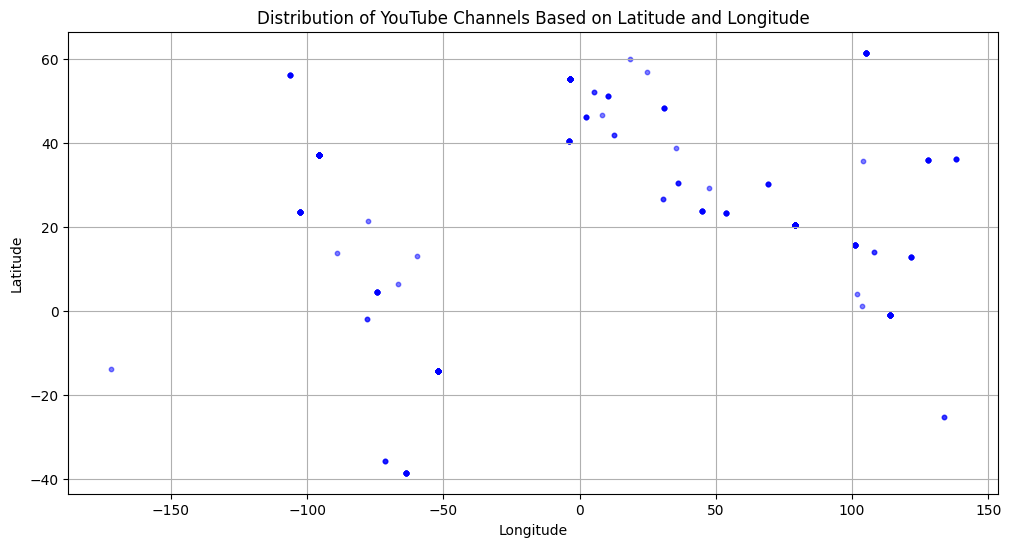

Based on the scatter plot of YouTube channels distributed by their latitude and longitude coordinates, the following patterns are observed:

1. Northern Hemisphere Dominance:

A majority of YouTube channels are concentrated in the northern hemisphere, particularly between 20°N and 60°N latitude. This suggests a higher density of YouTube channels in regions like North America, Europe, and parts of Asia.

2. Clustering around Specific Longitudes:

Noticeable clusters are found around the longitude ranges of -150° to -50° (covering the Americas) and 0° to 100° (covering Europe and Asia). This indicates a higher prevalence of YouTube channels in these longitudes, likely due to higher population densities and better internet infrastructure in these regions.

3. Sparse Distribution in the Southern Hemisphere:

There are fewer YouTube channels in the southern hemisphere, particularly in the latitude ranges between -40° to 0°. This suggests less representation from regions such as South Americ

In [18]:
# 14. Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?

# Filter out rows where latitude and longitude data is not available
df_filtered = df.dropna(subset=['Latitude', 'Longitude'])

# Plotting the scatter plot on a world map
plt.figure(figsize=(12, 6))
plt.scatter(df_filtered['Longitude'],
            df_filtered['Latitude'], alpha=0.5, c='blue', s=10)

plt.title('Distribution of YouTube Channels Based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

print('''Based on the scatter plot of YouTube channels distributed by their latitude and longitude coordinates, the following patterns are observed:

1. Northern Hemisphere Dominance:

A majority of YouTube channels are concentrated in the northern hemisphere, particularly between 20°N and 60°N latitude. This suggests a higher density of YouTube channels in regions like North America, Europe, and parts of Asia.

2. Clustering around Specific Longitudes:

Noticeable clusters are found around the longitude ranges of -150° to -50° (covering the Americas) and 0° to 100° (covering Europe and Asia). This indicates a higher prevalence of YouTube channels in these longitudes, likely due to higher population densities and better internet infrastructure in these regions.

3. Sparse Distribution in the Southern Hemisphere:

There are fewer YouTube channels in the southern hemisphere, particularly in the latitude ranges between -40° to 0°. This suggests less representation from regions such as South America, Africa, and Oceania.

4. Geographical Concentration:

The concentration of YouTube channels aligns with highly populated and developed regions, which may reflect better internet infrastructure and a higher level of digital engagement in these areas.


Conclusion :- These patterns indicate that the distribution of YouTube channels is influenced by geographical, demographic, and infrastructural factors, with more channels present in regions with higher population densities and better internet connectivity.''')

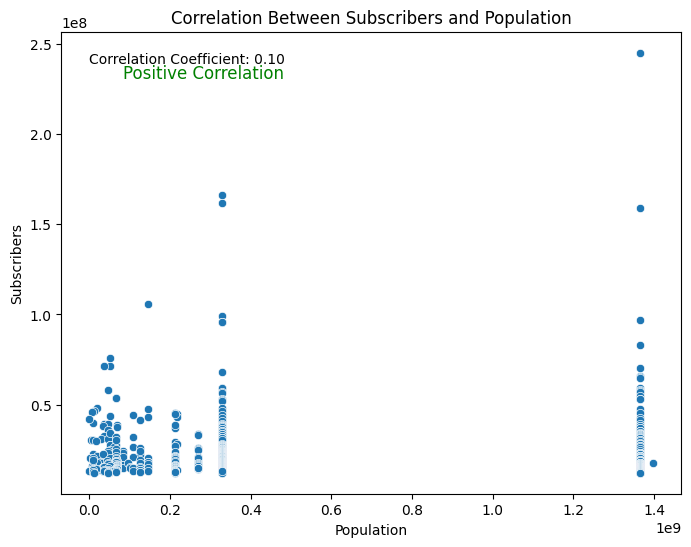

Pearson Correlation Coefficient: 0.10429950791314799
There is a positive correlation between the number of subscribers and the population of a country.


In [19]:
# 15. What is the correlation between the number of subscribers and the population of a country?

# Calculate the Pearson correlation coefficient between subscribers and population
correlation = df['subscribers'].corr(df['Population'])

# Scatter plot of subscribers vs population
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Population', y='subscribers', data=df)
plt.title('Correlation Between Subscribers and Population')
plt.xlabel('Population')
plt.ylabel('Subscribers')

# Print the Pearson correlation coefficient on the plot
plt.text(df['Population'].min(), df['subscribers'].max(),
         f'Correlation Coefficient: {correlation:.2f}', ha='left', va='top')

# Conclusion based on the coefficient
if correlation > 0:
    plt.annotate("Positive Correlation", xy=(0.1, 0.9),
                 xycoords='axes fraction', fontsize=12, color='green')
elif correlation < 0:
    plt.annotate("Negative Correlation", xy=(0.1, 0.9),
                 xycoords='axes fraction', fontsize=12, color='red')
else:
    plt.annotate("No Correlation", xy=(0.1, 0.9),
                 xycoords='axes fraction', fontsize=12, color='blue')

plt.show()

print(f"Pearson Correlation Coefficient: {correlation}")

# Conclusion based on the coefficient
if correlation > 0:
    print("There is a positive correlation between the number of subscribers and the population of a country.")
elif correlation < 0:
    print("There is a negative correlation between the number of subscribers and the population of a country.")
else:
    print("There is no significant correlation between the number of subscribers and the population of a country.")

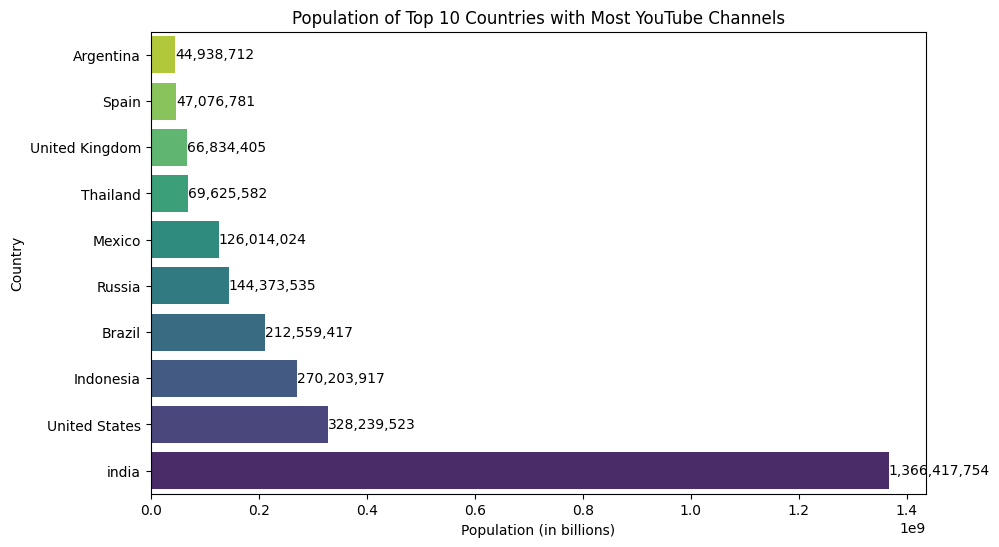

In [20]:
# 16. How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?

# Filter the DataFrame to include only the top 10 countries
df_top_10_countries = df[df['Country'].isin(top_10_countries)]

# Group by country and get the first population value (assuming populations are consistent for each country)
population_top_10_countries = df_top_10_countries.groupby(
    'Country')['Population'].first().sort_values(ascending=False)

# Plotting the bar chart with values and countries in descending order
plt.figure(figsize=(10, 6))
sns.barplot(x=population_top_10_countries.values,
            y=population_top_10_countries.index, palette='viridis')

# Annotate the bars with population values
for i, value in enumerate(population_top_10_countries.values):
    plt.text(value, i, f'{value:,}', ha='left', va='center', color='black')

plt.title('Population of Top 10 Countries with Most YouTube Channels')
plt.xlabel('Population (in billions)')
plt.ylabel('Country')

# Reverse the y-axis to show countries in descending order
plt.gca().invert_yaxis()

plt.show()

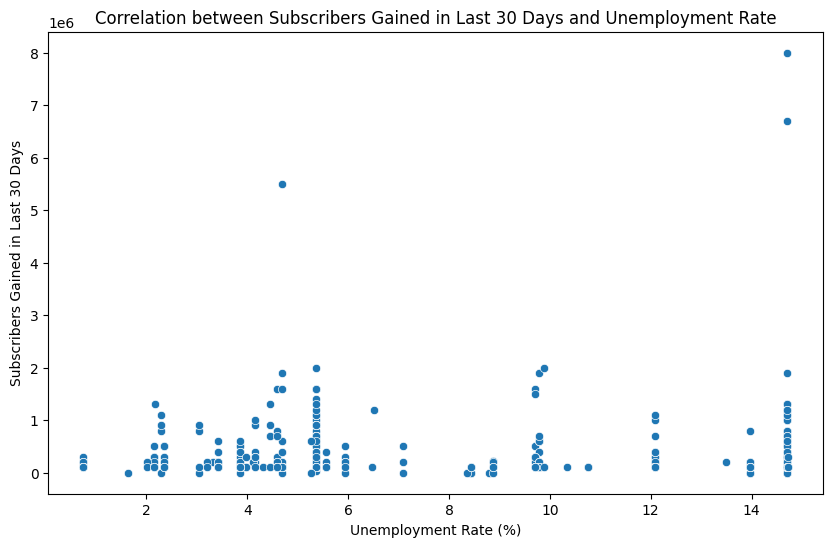

Pearson Correlation Coefficient: -0.008366005999595872
There is a negative correlation between the number of subscribers gained in the last 30 days and the unemployment rate.
The Pearson Correlation Coefficient of approximately -0.008 suggests a very weak negative correlation between the number of subscribers gained in the last 30 days and the unemployment rate.
 This means that there is a slight tendency for the number of subscribers gained to decrease slightly as the unemployment rate in a country increases, and vice versa.
 However, the correlation is so close to zero that it is not practically significant, indicating that there is no meaningful relationship between these two variables in the dataset analyzed.


In [21]:
# 17. Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?

# Calculate the Pearson correlation coefficient
correlation = df['subscribers_for_last_30_days'].corr(
    df['Unemployment rate (%)'])

# Scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment rate (%)',
                y='subscribers_for_last_30_days', data=df)
plt.title(
    'Correlation between Subscribers Gained in Last 30 Days and Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Subscribers Gained in Last 30 Days')
plt.show()

# Print the Pearson correlation coefficient and provide a conclusion
print(f"Pearson Correlation Coefficient: {correlation}")

# Conclusion based on the coefficient
if correlation > 0:
    print("There is a positive correlation between the number of subscribers gained in the last 30 days and the unemployment rate.")
elif correlation < 0:
    print("There is a negative correlation between the number of subscribers gained in the last 30 days and the unemployment rate.")
else:
    print("There is no significant correlation between the number of subscribers gained in the last 30 days and the unemployment rate.")

print('''The Pearson Correlation Coefficient of approximately -0.008 suggests a very weak negative correlation between the number of subscribers gained in the last 30 days and the unemployment rate.\n This means that there is a slight tendency for the number of subscribers gained to decrease slightly as the unemployment rate in a country increases, and vice versa.\n However, the correlation is so close to zero that it is not practically significant, indicating that there is no meaningful relationship between these two variables in the dataset analyzed.''')

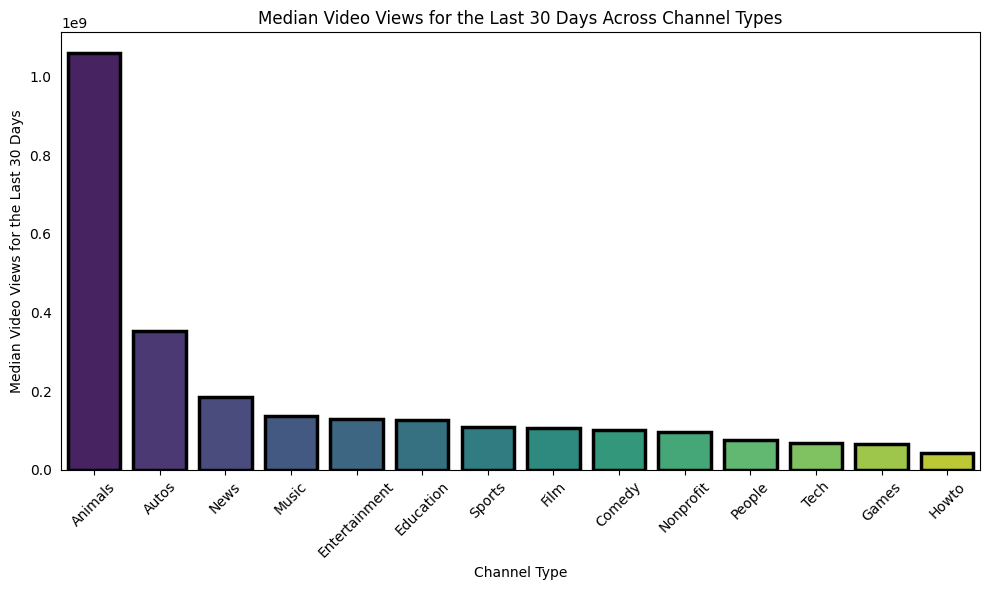

Channel Types in Order of Decreasing Views for the Last 30 Days:
Index(['Animals', 'Autos', 'News', 'Music', 'Entertainment', 'Education',
       'Sports', 'Film', 'Comedy', 'Nonprofit', 'People', 'Tech', 'Games',
       'Howto'],
      dtype='object', name='channel_type')


In [22]:
# 18. How does the distribution of video views for the last 30 days vary across different channel types?

# Calculate the median video views for each channel type
median_views_per_channel = df.groupby(
    'channel_type')['video_views_for_the_last_30_days'].median()
median_views_per_channel = median_views_per_channel.sort_values(
    ascending=False)

# Bar plot to visualize the median views across channel types
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=median_views_per_channel.index, y=median_views_per_channel.values,
                       palette='viridis', linewidth=2.5, edgecolor='black', saturation=0.75)
plt.title('Median Video Views for the Last 30 Days Across Channel Types')
plt.xlabel('Channel Type')
plt.ylabel('Median Video Views for the Last 30 Days')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Remove the ticks from the y-axis
plt.tick_params(axis='y', which='both', left=False)

# Adjust spacing between bars
plt.tight_layout()

plt.show()

# Print channel types in order of decreasing views for the last 30 days
print("Channel Types in Order of Decreasing Views for the Last 30 Days:")
print(median_views_per_channel.index)

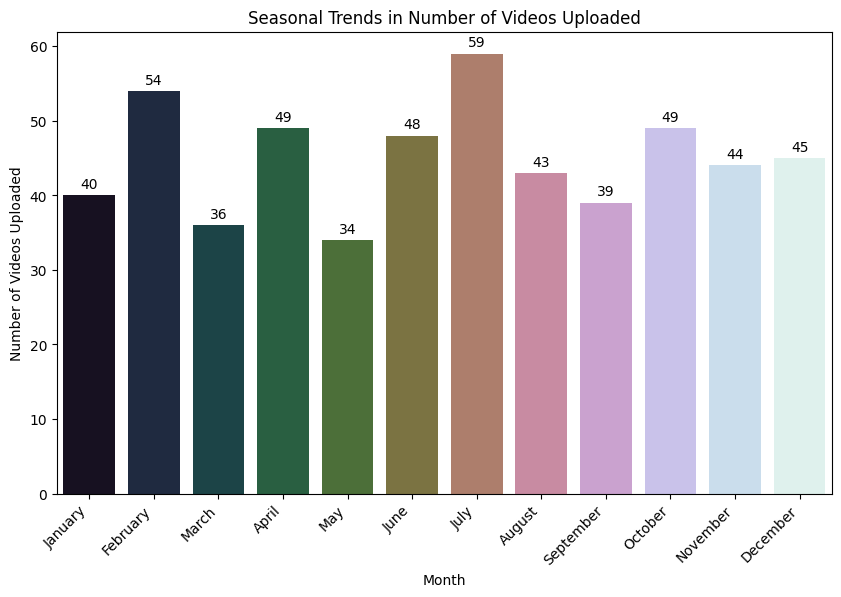

Conclusion:
The countplot shows the seasonal trends in the number of videos uploaded by YouTube channels.
By analyzing the plot along with the annotated values on the bars, we can observe any significant variations in video uploads across different months.


In [23]:
# 19. Are there any seasonal trends in the number of videos uploaded by YouTube channels?

df['upload_month'] = df['created_date'].dt.month
# Convert month numbers to month names
df['upload_month_name'] = df['upload_month'].apply(
    lambda x: calendar.month_name[x])

# Countplot to visualize seasonal trends in number of videos uploaded
plt.figure(figsize=(10, 6))
countplot = sns.countplot(x='upload_month_name', data=df, palette='cubehelix')
plt.title('Seasonal Trends in Number of Videos Uploaded')
plt.xlabel('Month')
plt.ylabel('Number of Videos Uploaded')

# Set x-axis ticks with month names
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(calendar.month_name[1:], rotation=45, ha='right')

# Annotate the bars with the count values
for bar in countplot.patches:
    countplot.annotate(format(bar.get_height(), '.0f'),
                        (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                        size=10, xytext=(0, 8), textcoords='offset points')

plt.show()

# Conclusion based on the plot
print("Conclusion:")
print("The countplot shows the seasonal trends in the number of videos uploaded by YouTube channels.")
print("By analyzing the plot along with the annotated values on the bars, we can observe any significant variations in video uploads across different months.")

In [24]:
# 20. What is the average number of subscribers gained per month since the creation of YouTube channels till now?

df['created_date'] = pd.to_datetime(df['created_date'])

# Calculate months since creation and average subs per month
df['months_since_creation'] = (pd.to_datetime(
    'today') - df['created_date']).dt.days // 30
df['avg_subs_per_month'] = df['subscribers'] / df['months_since_creation']

# # Print each channel name and the average number of subscribers gained per month
# print("Channel Name\t\tAverage Subscribers Gained per Month")
# print("----------------------------------------------------")
# for index, row in df.iterrows():
#     print(f"{row['Youtuber']}\t\t{row['avg_subs_per_month']:.2f}")

# Calculate and print the mean of the average subscribers gained per month
mean_subs_per_month = df['avg_subs_per_month'].mean()
print("\nMean Average Subscribers Gained per Month:", mean_subs_per_month)


Mean Average Subscribers Gained per Month: 200783.50667527522


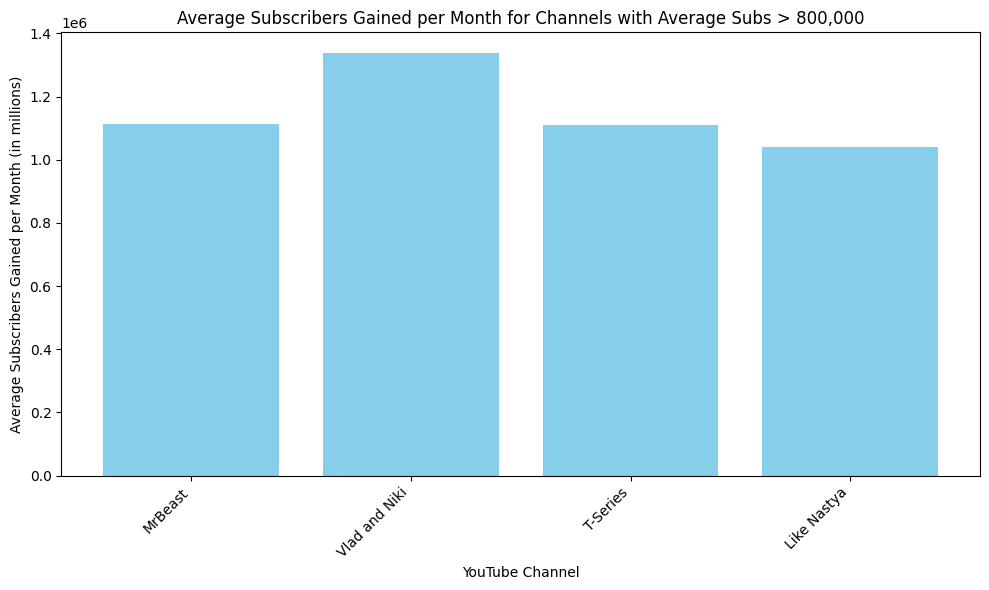

In [25]:
df['created_date'] = pd.to_datetime(df['created_date'])

# Calculate months since creation and average subs per month
df['months_since_creation'] = (pd.to_datetime(
    'today') - df['created_date']).dt.days // 30
df['avg_subs_per_month'] = df['subscribers'] / df['months_since_creation']

# Filter channels with average subs greater than 800,000
filtered_channels = df[df['avg_subs_per_month'] > 800000]

# Plot the graph with filtered channels
plt.figure(figsize=(10, 6))
plt.bar(filtered_channels['Youtuber'],
        filtered_channels['avg_subs_per_month'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('YouTube Channel')
plt.ylabel('Average Subscribers Gained per Month (in millions)')
plt.title(
    'Average Subscribers Gained per Month for Channels with Average Subs > 800,000')
plt.tight_layout()
plt.show()

In [26]:
# Sort the DataFrame by 'avg_subs_per_month' in descending order
top_5_channels = filtered_channels.sort_values(
    by='avg_subs_per_month', ascending=False).head(5)

# Print the top 5 channels
print("Top 5 Channels with Average Subscribers Gained per Month > 800,000:")
print(top_5_channels[['Youtuber', 'avg_subs_per_month']])

Top 5 Channels with Average Subscribers Gained per Month > 800,000:
          Youtuber  avg_subs_per_month
2    Vlad and Niki        1.336486e+06
0          MrBeast        1.114094e+06
176       T-Series        1.108597e+06
428    Like Nastya        1.039216e+06
